<a href="https://colab.research.google.com/github/mzeruesenay1/Superheroes/blob/main/Superheroes_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Super Hero Statistical Analysis**


## **Load Dataset**

In [5]:
import pandas as pd
import numpy as np

In [9]:
# Load superhero dataset
heroes_url = "https://drive.google.com/uc?id=1kgrbMWapAWWjOqUeJoqQVN7Kgh-0GFyD"
powers_url = "https://drive.google.com/uc?id=1CzJ-WTQuZStSJSt_M2HAl61F7djrrC18"

In [10]:
heroes_df = pd.read_csv(heroes_url)
powers_df = pd.read_csv(powers_url)



In [11]:
heroes_df['Race'] = heroes_df['Race'].replace({'-':np.nan})
heroes_df['Alignment'] = heroes_df['Alignment'].replace({'-':np.nan})

In [12]:
# Display first few rows
heroes_df.head(), powers_df.head()


(          name Gender Eye color               Race Hair color  Height  \
 0       A-Bomb   Male    yellow              Human    No Hair   203.0   
 1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   191.0   
 2     Abin Sur   Male      blue            Ungaran    No Hair   185.0   
 3  Abomination   Male     green  Human / Radiation    No Hair   203.0   
 4      Abraxas   Male      blue      Cosmic Entity      Black   -99.0   
 
            Publisher Skin color Alignment  Weight  
 0      Marvel Comics          -      good   441.0  
 1  Dark Horse Comics       blue      good    65.0  
 2          DC Comics        red      good    90.0  
 3      Marvel Comics          -       bad   441.0  
 4      Marvel Comics          -       bad   -99.0  ,
     hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
 0      3-D Man     True                False               False   
 1       A-Bomb    False                 True               False   
 2   Abe Sapien     True    

## **Descriptive Statistics**

In [13]:
# Summary of numerical columns
print(heroes_df.describe())

           Height      Weight
count  734.000000  732.000000
mean   102.254087   43.855191
std    139.624543  130.823733
min    -99.000000  -99.000000
25%    -99.000000  -99.000000
50%    175.000000   62.000000
75%    185.000000   90.000000
max    975.000000  900.000000


In [14]:
# Most common superhero race
print("Most common superhero race:", heroes_df['Race'].mode()[0])

Most common superhero race: Human


In [15]:
# Count of superheroes by alignment (Hero, Villain, Neutral)
print(heroes_df['Alignment'].value_counts())

Alignment
good       496
bad        207
neutral     24
Name: count, dtype: int64


In [16]:
# Check for missing values
print(heroes_df.isnull().sum())

name            0
Gender          0
Eye color       0
Race          304
Hair color      0
Height          0
Publisher      15
Skin color      0
Alignment       7
Weight          2
dtype: int64


## **Inferential Statistics** - Comparing Groups

In [17]:
from scipy import stats


In [19]:
# Separate Marvel and DC superheroes
marvel_heights = heroes_df[heroes_df['Publisher'] == 'Marvel Comics']['Height'].dropna()
dc_heights = heroes_df[heroes_df['Publisher'] == 'DC Comics']['Height'].dropna()

In [20]:
# Perform independent T-test
t_stat, p_value = stats.ttest_ind(marvel_heights, dc_heights)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: 4.748, P-value: 0.000


In [21]:
# Merge datasets
merged_df = heroes_df.merge(powers_df, left_on='name', right_on='hero_names', how='left')

# Filter heroes and villains
heroes = merged_df[merged_df['Alignment'] == 'good']
villains = merged_df[merged_df['Alignment'] == 'bad']

# Count how many have Super Strength
heroes_with_strength = heroes['Super Strength'].sum()  # True = 1, False = 0
villains_with_strength = villains['Super Strength'].sum()

# Create a contingency table
contingency_table = [[heroes_with_strength, len(heroes) - heroes_with_strength],
                     [villains_with_strength, len(villains) - villains_with_strength]]

# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.3f}, P-value: {p_value:.3f}")

Chi-Square Statistic: 18.662, P-value: 0.000


In [22]:
from scipy.stats import fisher_exact

# Perform Fisher's Exact Test (for small sample sizes)
odds_ratio, p_value_fisher = fisher_exact(contingency_table)

print(f"Fisher's Exact Test P-value: {p_value_fisher:.3f}")

Fisher's Exact Test P-value: 0.000


## **Probability** - What are the chances?

In [23]:
# Probability of a hero having Super Speed
speed_probability = powers_df['Super Speed'].mean()
print(f"Probability of having Super Speed: {speed_probability:.2f}")

Probability of having Super Speed: 0.37


In [25]:
# Probability of having both Flight and Super Strength
both_powers = (powers_df['Flight'] & powers_df['Super Strength']).mean()
print(f"Probability of having both Flight & Super Strength: {both_powers:.2f}")

Probability of having both Flight & Super Strength: 0.22


In [27]:
# Probability of having Flight OR Super Strength
either_power = (powers_df['Flight'] | powers_df['Super Strength']).mean()
print(f"Probability of having Flight OR Super Strength: {either_power:.2f}")

Probability of having Flight OR Super Strength: 0.64


## **Correlation**

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
# Compute correlation
correlation_matrix = heroes_df[['Height', 'Weight']].corr()
print(correlation_matrix)

          Height    Weight
Height  1.000000  0.683375
Weight  0.683375  1.000000


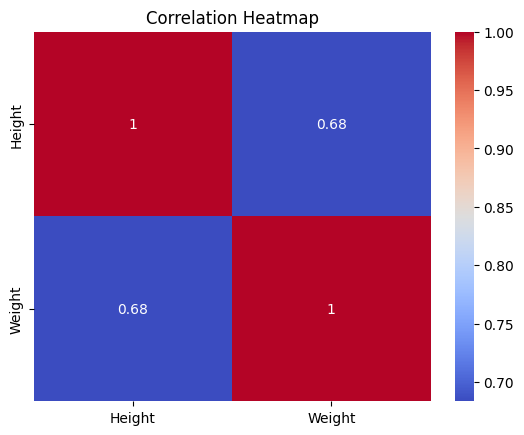

In [30]:
# Heatmap visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Regression**

### Prepare Data

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [32]:
# Extract Strength and Flight columns
X = powers_df[['Super Strength']].astype(int)  # Convert True/False to 0/1
y = powers_df['Flight'].astype(int) # Convert True/False to 0/1


In [33]:
# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model

In [35]:
# Initialize logistic regression model
log_reg = LogisticRegression()


In [36]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

### Make Predictions

In [40]:
# Predict probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:,1]  # Probability of having Flight

In [41]:
# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [42]:
# Display results
print("Example Predictions:")
for i in range(5):
    print(f"Super Strength: {X_test.iloc[i,0]}, Predicted Flight: {y_pred[i]} (Prob: {y_pred_prob[i]:.2f})")

Example Predictions:
Super Strength: 0, Predicted Flight: 0 (Prob: 0.21)
Super Strength: 0, Predicted Flight: 0 (Prob: 0.21)
Super Strength: 1, Predicted Flight: 0 (Prob: 0.40)
Super Strength: 0, Predicted Flight: 0 (Prob: 0.21)
Super Strength: 0, Predicted Flight: 0 (Prob: 0.21)


### Model Interpretation

In [43]:
print(f"Intercept: {log_reg.intercept_[0]}")
print(f"Coefficient for Strength: {log_reg.coef_[0][0]}")
# What This Means: The coefficient tells us how much having Super Strength increases the probability of Flight
# A positive coefficient means superheroes WITH strength are more likely to have flight
# A negative coefficient would suggest the opposite

Intercept: -1.2998096827367296
Coefficient for Strength: 0.9044531540256044


### Visualizing the Relationship

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


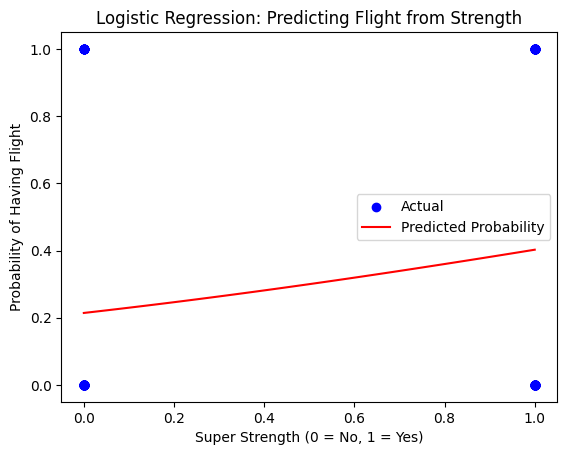

In [47]:
# Scatterplot of actual values
plt.scatter(X_test, y_test, color='blue', label="Actual")

# Plot logistic regression curve
x_values = np.linspace(0, 1, 100).reshape(-1, 1)
y_values = log_reg.predict_proba(x_values)[:,1]

plt.plot(x_values, y_values, color='red', label="Predicted Probability")
plt.xlabel("Super Strength (0 = No, 1 = Yes)")
plt.ylabel("Probability of Having Flight")
plt.title("Logistic Regression: Predicting Flight from Strength")
plt.legend()
plt.show()

Interpretation:
- If Super Strength is 1 (True), the probability of Flight is higher.
- If Super Strength is 0 (False), the probability of Flight is lower.
- The logistic curve shows how the probability increases with Strength.